### Downloads and installs

In [95]:
#%pip install plotly
#%pip install ipython ipywidgets nbformat


## 1) Importation of necessary libraries

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import scipy.stats as stats
import plotly.io as pio
from scipy import stats
from scipy.stats import chi2_contingency, fisher_exact

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline


## 2) Loading the dataset

In [101]:
#Importation of the dataset
df = pd.read_csv('student_depression_dataset.csv')
df.head()
data = df.copy()



In [103]:
#Display an excerpt of the dataset
df

id  Gender   Age           City Profession  Academic Pressure  \
0           2    Male  33.0  Visakhapatnam    Student                5.0   
1           8  Female  24.0      Bangalore    Student                2.0   
2          26    Male  31.0       Srinagar    Student                3.0   
3          30  Female  28.0       Varanasi    Student                3.0   
4          32  Female  25.0         Jaipur    Student                4.0   
...       ...     ...   ...            ...        ...                ...   
27896  140685  Female  27.0          Surat    Student                5.0   
27897  140686    Male  27.0       Ludhiana    Student                2.0   
27898  140689    Male  31.0      Faridabad    Student                3.0   
27899  140690  Female  18.0       Ludhiana    Student                5.0   
27900  140699    Male  27.0          Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0                0.0  8.97                 2.0               0.0   
1                0.0  5.90                 5.0               0.0   
2                0.0  7.03                 5.0               0.0   
3                0.0  5.59                 2.0               0.0   
4                0.0  8.13                 3.0               0.0   
...              ...   ...                 ...               ...   
27896            0.0  5.75                 5.0               0.0   
27897            0.0  9.40                 3.0               0.0   
27898            0.0  6.61                 4.0               0.0   
27899            0.0  6.88                 2.0               0.0   
27900            0.0  9.24                 1.0               0.0   

            Sleep Duration Dietary Habits      Degree  \
0              '5-6 hours'        Healthy     B.Pharm   
1              '5-6 hours'       Moderate         BSc   
2      'Less than 5 hours'        Healthy          BA   
3              '7-8 hours'       Moderate         BCA   
4              '5-6 hours'       Moderate      M.Tech   
...                    ...            ...         ...   
27896          '5-6 hours'      Unhealthy  'Class 12'   
27897  'Less than 5 hours'        Healthy         MSc   
27898          '5-6 hours'      Unhealthy          MD   
27899  'Less than 5 hours'        Healthy  'Class 12'   
27900  'Less than 5 hours'        Healthy         BCA   

      Have you ever had suicidal thoughts ?  Work/Study Hours  \
0                                       Yes               3.0   
1                                        No               3.0   
2                                        No               9.0   
3                                       Yes               4.0   
4                                       Yes               1.0   
...                                     ...               ...   
27896                                   Yes               7.0   
27897                                    No               0.0   
27898                                    No              12.0   
27899                                   Yes              10.0   
27900                                   Yes               2.0   

      Financial Stress Family History of Mental Illness  Depression  
0                  1.0                               No           1  
1                  2.0                              Yes           0  
2                  1.0                              Yes           0  
3                  5.0                              Yes           1  
4                  1.0                               No           0  
...                ...                              ...         ...  
27896              1.0                              Yes           0  
27897              3.0                              Yes           0  
27898              2.0                               No           0  
27899              5.0                               No           1  
27900              3.0                       

### 2.2 Data Types Verification

In [106]:
df.describe()

id           Age  Academic Pressure  Work Pressure  \
count   27901.000000  27901.000000       27901.000000   27901.000000   
mean    70442.149421     25.822300           3.141214       0.000430   
std     40641.175216      4.905687           1.381465       0.043992   
min         2.000000     18.000000           0.000000       0.000000   
25%     35039.000000     21.000000           2.000000       0.000000   
50%     70684.000000     25.000000           3.000000       0.000000   
75%    105818.000000     30.000000           4.000000       0.000000   
max    140699.000000     59.000000           5.000000       5.000000   

               CGPA  Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count  27901.000000        27901.000000      27901.000000      27901.000000   
mean       7.656104            2.943837          0.000681          7.156984   
std        1.470707            1.361148          0.044394          3.707642   
min        0.000000            0.000000          0.000000          0.000000   
25%        6.290000            2.000000          0.000000          4.000000   
50%        7.770000            3.000000          0.000000          8.000000   
75%        8.920000            4.000000          0.000000         10.000000   
max       10.000000            5.000000          4.000000         12.000000   

         Depression  
count  27901.000000  
mean       0.585499  
std        0.492645  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

### 2.3 Descriptive of dataset

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

### 2.4  Verification of missing values

In [112]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

There are no missing values in the dataset

### 2.5 Verification of duplicate rows

In [116]:
print("Duplicates :", df.duplicated().sum())

Duplicates : 0


There is no duplicate in the dataset

2.5 Traitement of values considered as outliers

####  Methode 1 : Boxplots (Moustaches)

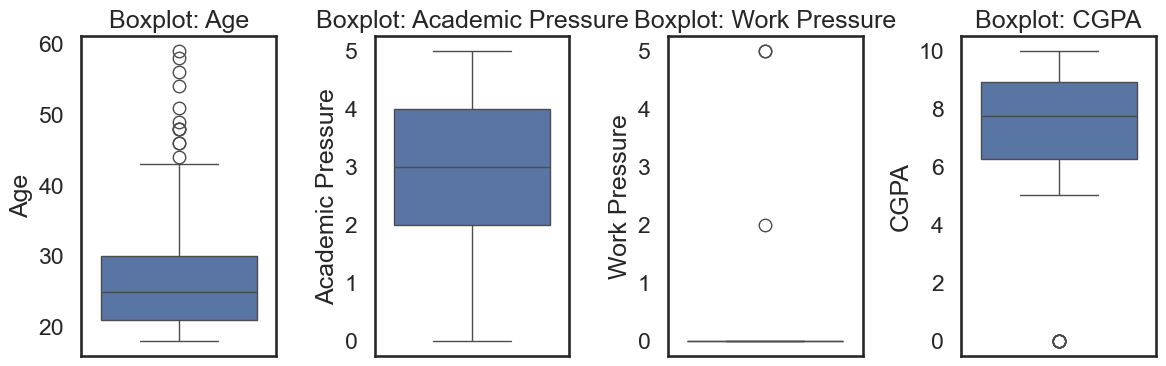

In [121]:
# Good for: Seeing the range and isolated points visually
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('id', errors='ignore')

plt.figure(figsize=(12, 4))
for i, col in enumerate(numeric_cols[:4], 1): # Showing first 4 columns
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()

The boxplots provide a clear visualization of the data spread:
*   **Age:** The distribution is concentrated between 20 and 30 years old. The circles above the upper whisker indicate **outliers**, representing mature students aged 45+.
*   **Work Pressure:** The box is completely flattened at 0. This confirms that the vast majority of the subjects are students without jobs. The isolated points at values 2 and 5 represent rare exceptions.
*   **CGPA:** Most grades fall between 6 and 9. A distinct outlier is visible at **0.0**, which likely indicates missing data or a data entry error rather than a genuine grade.

####  Methode 2: Distribution (Histograms)

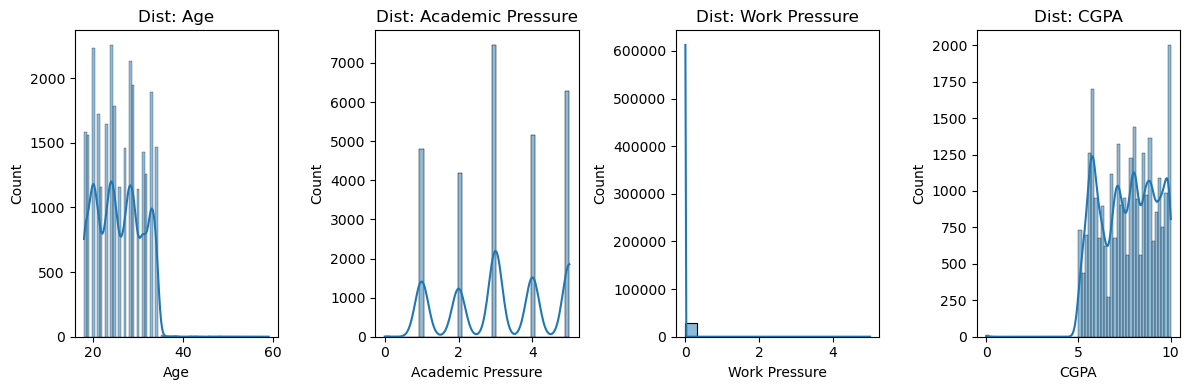

In [23]:
# Good for: Checking if data is Normal (Gaussian) or skewed
plt.figure(figsize=(12, 4))
for i, col in enumerate(numeric_cols[:4], 1):
    plt.subplot(1, 4, i)
    sns.histplot(df[col], kde=True) # kde=True adds the curve
    plt.title(f"Dist: {col}")
plt.tight_layout()
plt.show()

*   **Age:** The histogram is **right-skewed**, confirming that the population is predominantly young adults, which is consistent with a student dataset.
*   **Academic Pressure:** Displays a multi-modal distribution with peaks at integer values (1, 2, 3...), typical for Likert-scale survey data.
*   **Work Pressure:** Shows a **zero-inflated distribution**. Since the target population is students, this variable has almost zero variance and might not be useful for the model.
*   **CGPA:** The distribution is **left-skewed**, meaning most students perform relatively well (grades > 7), with a very small tail of failing grades.

#### Methode 3: Z-score (Statistical)

In [26]:
# Good for: Mathematically flagging the outliers
print("Z-Score Detection:")
z_scores = np.abs(stats.zscore(df[numeric_cols].fillna(df[numeric_cols].median())))
outliers_count = (z_scores > 3).sum(axis=0)

# Display columns that actually have outliers
print(outliers_count[outliers_count > 0])


Z-Score Detection:
Age                 19
Work Pressure        3
CGPA                 9
Job Satisfaction     8
dtype: int64


The statistical analysis (Z-score > 3) identified precise counts of anomalies:
*   **Age (19 outliers):** Corresponds to the few students significantly older than the average.
*   **CGPA (9 outliers):** These likely correspond to values of 0.0 or extremely low scores that deviate mathematically from the norm.
*   **Work Pressure (3 outliers):** Since almost everyone scored 0, the few students who reported pressure are statistically considered outliers, although they might be valid data points (students with part-time jobs).

## 3) Data cleaning

### 3.1 Erasement of usless columns

In [30]:
df = df.drop(columns=['id'], errors='ignore')
print(df.columns.tolist())


['Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']


### 3.2 Outliers treatment

In [32]:
print("Applying corrections :")

# 1. TREAT CGPA (9 outliers detected)
# Solution: Replace invalid values (<= 0 or > 10) with the Median of the valid values.
valid_cgpa_median = df.loc[(df['CGPA'] > 0) & (df['CGPA'] <= 10), 'CGPA'].median()
mask_cgpa = (df['CGPA'] <= 0) | (df['CGPA'] > 10)
print(f"Fixing {mask_cgpa.sum()} values in CGPA (replacing with median: {valid_cgpa_median})")
df.loc[mask_cgpa, 'CGPA'] = valid_cgpa_median

# 2. TREAT AGE (19 outliers detected)
# Problem: Students > 45-50 years old (extreme outliers for this specific analysis).
# Solution: Cap the Age at 50 (Winsorization).
print(f"Capping Age at 50 for {len(df[df['Age'] > 50 ])} rows.")
df['Age'] = np.where(df['Age'] > 50, 50, df['Age'])

# 3. TREAT WORK PRESSURE (3 outliers detected)
# Problem: Rare high values. Assuming scale is 0-5.
# Solution: Cap at 5 if any value exceeds the scale.
df['Work Pressure'] = np.where(df['Work Pressure'] > 5, 5, df['Work Pressure'])


# 6. VERIFICATION
print("Post-Cleaning Verification :")
# Checking Z-scores again on the clean data (df)
numeric_cols = ['Age', 'CGPA', 'Work Pressure']
z_scores_clean = np.abs(stats.zscore(df[numeric_cols]))
outliers_clean = (z_scores_clean > 3).sum(axis=0)

print("Remaining outliers after treatment:")
print(pd.Series(outliers_clean, index=numeric_cols))

Applying corrections :
Fixing 9 values in CGPA (replacing with median: 7.77)
Capping Age at 50 for 5 rows.
Post-Cleaning Verification :
Remaining outliers after treatment:
Age              19
CGPA              0
Work Pressure     3
dtype: int64


In [33]:
print("Final sanity check (Max values) :")

# Check if Age is capped at 50
print(f"Max Age in dataset: {df['Age'].max()} (Should be 50.0)")

# Check if Work Pressure is capped at 5
print(f"Max Work Pressure: {df['Work Pressure'].max()} (Should be <= 5.0)")

# Check if CGPA is clean
print(f"Min CGPA: {df['CGPA'].min()} (Should be > 0)")
print(f"Max CGPA: {df['CGPA'].max()} (Should be <= 10)")

Final sanity check (Max values) :
Max Age in dataset: 50.0 (Should be 50.0)
Max Work Pressure: 5.0 (Should be <= 5.0)
Min CGPA: 5.03 (Should be > 0)
Max CGPA: 10.0 (Should be <= 10)


#### Post-Treatment Verification

After applying the capping (winsorization) strategy, we ran the Z-score verification again.
*   **CGPA:** 0 outliers remaining. The imputation worked perfectly.
*   **Age:** The Z-score still flags 19 values. This is expected: we capped age at 50, but statistically, 50 is still significantly higher than the mean (~26). However, these values are now within a realistic range and safe for the model.
*   **Work Pressure:** The Z-score still flags 3 values. Since this variable is **zero-inflated** (almost everyone is at 0), any non-zero value is mathematically flagged as an outlier, even if it is a valid entry (e.g., pressure level 3/5).

**Conclusion:** We confirmed via `df.max()` that no impossible values remain (e.g., no Age > 50, no CGPA > 10). The dataset is now clean.

## 4) Modeling 

### 4.1 Model without modifications of the dataset


In [37]:
# Separate features (X) and target (y)
target = "Depression"
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (22320, 16)
Test shape: (5581, 16)


In [38]:

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()

#  Pretreatment 
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', 'passthrough', numeric_cols)
])

In [39]:
# Models to evaluate
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}


 Model: Decision Tree
              precision    recall  f1-score   support

          No       0.72      0.72      0.72      2313
         Yes       0.80      0.80      0.80      3268

    accuracy                           0.77      5581
   macro avg       0.76      0.76      0.76      5581
weighted avg       0.77      0.77      0.77      5581


 Model: Random Forest
              precision    recall  f1-score   support

          No       0.82      0.77      0.80      2313
         Yes       0.85      0.88      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



<Figure size 1000x600 with 0 Axes>

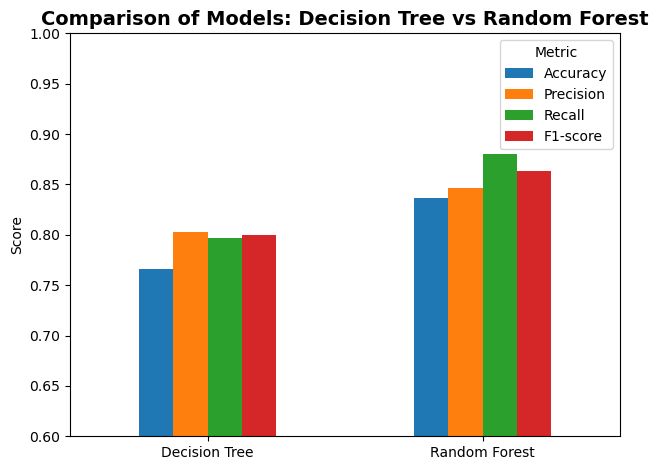

In [40]:
# Dictionary to store the scores
results = {}

# Training, evaluation, and metric storage
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Numerical results (detailed report)
    print(f"\n Model: {name}")
    print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))
    
    # Storing key metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }

# Convert to DataFrame
results_df = pd.DataFrame(results).T

# Comparative plot
plt.figure(figsize=(10,6))
results_df.plot(kind='bar')
plt.title("Comparison of Models: Decision Tree vs Random Forest", fontsize=14, fontweight='bold')
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0.6, 1.0)  # to better visualize the differences
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

#### Baseline Model Results Interpretation

We trained two baseline models, **Decision Tree** and **Random Forest**, on the raw dataset to establish a performance benchmark.

**Performance Comparison**
*   **Random Forest** significantly outperformed the Decision Tree, achieving an **Accuracy of 83%** compared to 76%.
*   The Random Forest model demonstrates superior generalization capabilities, indicated by higher scores across all metrics (Precision, Recall, and F1-score).

**Class Analysis (Depression Detection)**
*   The dataset shows a slight imbalance (Support: 3268 "Yes" vs. 2313 "No"). Consequently, both models perform better on the majority class ("Yes").
*   **Critical Metric:** In the context of mental health, **Recall** for the positive class (detecting depression) is crucial. The Random Forest achieved a **Recall of 0.87**, meaning it correctly identified 87% of the students suffering from depression, whereas the Decision Tree only identified 80%.

**Conclusion**
The Random Forest's ensemble approach effectively reduced the variance inherent in single Decision Trees. With a baseline F1-score of **0.86 for the positive class**, Random Forest is the selected candidate for further optimization (hyperparameter tuning) and will be used to evaluate the impact of our data cleaning steps.

### 4.2 Modeling with features engineering

#### 4.2.1 Encoding features

In [44]:
# 1. FIX NUMERIC COLUMNS FIRST (Handle NaNs)

# We convert variables to numeric. 'coerce' creates NaN if the value is bad (e.g., text in a number column).
cols_to_numeric = ['Financial Stress', 'Depression']

for col in cols_to_numeric:
    # Force conversion
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # IMMEDIATE FIX: Fill the NaN values we just created
    # We use the median (safe choice) to remove the hole.
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    
    print(f"Fixed NaNs in {col}, filled with: {median_val}")


# 2. LABEL ENCODING (Binary Variables)

le = LabelEncoder()
binary_cols = ['Gender', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

for col in binary_cols:
    # Ensure column is string type before encoding to avoid errors
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])


# 3. ONE-HOT ENCODING (Multi-class Variables)

# CRITICAL FIX: We add `dtype=int` to force 0 and 1 instead of True/False
# This solves the "Text columns remaining" error.
categorical_cols = ['Degree', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)


# 4. FINAL VERIFICATION

print("\n--- Final Check ---")
print(f"Remaining NaNs: {df.isna().sum().sum()}")
print(f"Any non-numeric columns? {len(df.select_dtypes(exclude=[np.number]).columns)}")
print("Data shape:", df.shape)

Fixed NaNs in Financial Stress, filled with: 3.0
Fixed NaNs in Depression, filled with: 1.0

--- Final Check ---
Remaining NaNs: 0
Any non-numeric columns? 0
Data shape: (27901, 110)


#### Verification

In [46]:
# ---------------------------------------------------------
# STEP 2: RIGOROUS VERIFICATION (The Checklist)
# ---------------------------------------------------------
print("\n--- Verification Checklist ---")

# CHECK A: Are there any text columns left?
# We select columns that are NOT numbers. The result should be an empty list.
non_numeric = df.select_dtypes(exclude=[np.number]).columns
if len(non_numeric) > 0:
    print(f" CRITICAL ERROR: Text columns remaining: {non_numeric}")
else:
    print(" Success: All columns are numeric.")

# CHECK B: Are there any Missing Values (NaN)?
total_nans = df.isna().sum().sum()
if total_nans > 0:
    print(f" CRITICAL ERROR: Found {total_nans} NaN values.")
    # Optional: Display columns with NaNs
    print(df.columns[df.isna().any()].tolist())
else:
    print(" Success: No missing values (NaN).")

# CHECK C: Are there any Infinite Values?
# Sometimes division by zero creates 'inf', which crashes Sklearn just like NaN.
total_infs = np.isinf(df).values.sum()
if total_infs > 0:
    print(f" CRITICAL ERROR: Found {total_infs} infinite values.")
else:
    print(" Success: No infinite values.")


--- Verification Checklist ---
 Success: All columns are numeric.
 Success: No missing values (NaN).
 Success: No infinite values.


### 4.2.2 Exploratory Data Analysis

#### Overall Distribution of the Target Variable

C:\Users\Tehin\AppData\Local\Temp\ipykernel_43004\2246660511.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


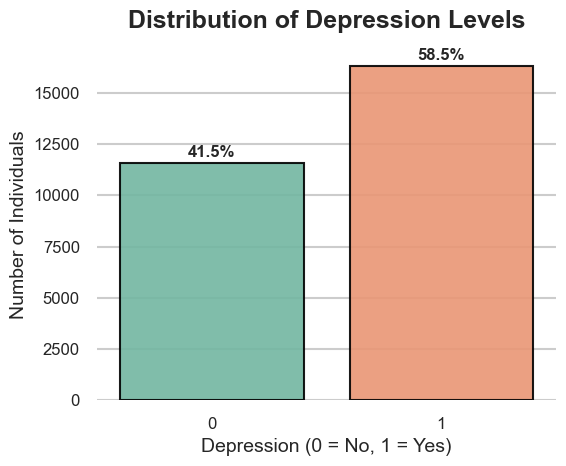

In [49]:
# General settings for the plots
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(6,5))
ax = sns.countplot(
    data=df,
    x='Depression',
    palette=['#66c2a5', '#fc8d62'],  
    edgecolor='black',
    alpha=0.9
)

# Adding percentage labels on top of the bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + total * 0.005,
        f'{100 * height / total:.1f}%',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

# Personnalisation of the plot
plt.title("Distribution of Depression Levels", fontsize=18, fontweight='bold', pad=15)
plt.xlabel("Depression (0 = No, 1 = Yes)", fontsize=14)
plt.ylabel("Number of Individuals", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


The distribution reveals a significant prevalence of depression, with 58.5% of individuals reporting being depressed, compared to 41.5% who are not. This high proportion highlights a major mental health issue within the studied population.

#### Distribution of features by depression

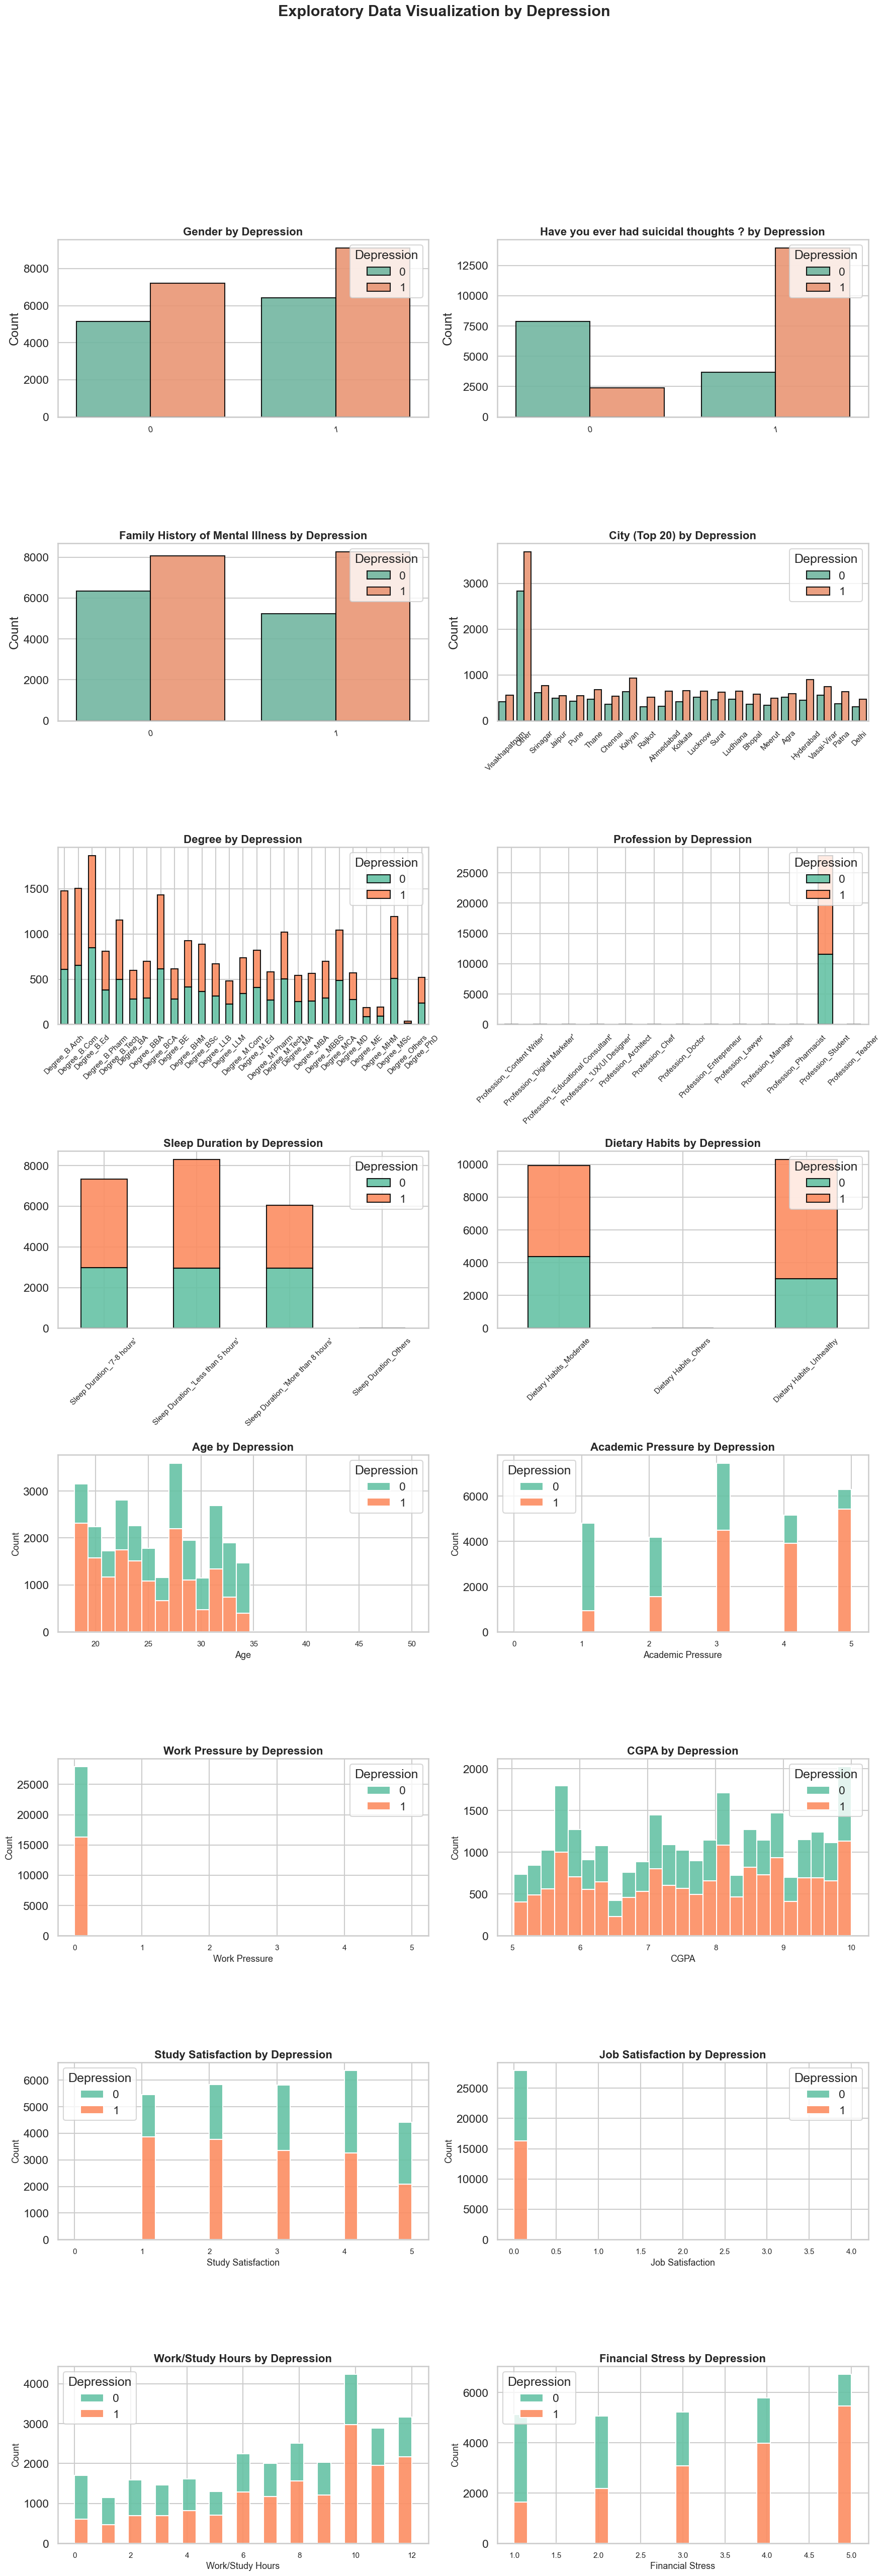

In [52]:
# Global style
sns.set_theme(style="whitegrid", context="talk", palette="Set2")

# Feature groups
binary_features = ['Gender', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
dummy_features_prefix = ['Degree_', 'Profession_', 'Sleep Duration_', 'Dietary Habits_']
num_features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
                'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

# Prepare City column (top 20 + "Other")
top_n = 20
top_cities = data['City'].value_counts().nlargest(top_n).index
data['City_plot'] = data['City'].apply(lambda x: x if x in top_cities else 'Other')

# Count total number of plots
n_binary = len(binary_features)
n_dummy = sum([len([c for c in df.columns if c.startswith(p)]) for p in dummy_features_prefix]) + 1  # +1 for City_plot
n_numeric = len(num_features)
total_plots = n_binary + n_dummy + n_numeric

# Adjust grid size (bigger and clearer)
cols = 2  # fewer columns for larger individual plots
rows = (total_plots // cols) + (total_plots % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize=(cols*9, rows*6))  # increased figure size
axes = axes.flatten()

plot_idx = 0

# Binary features
for col in binary_features:
    sns.countplot(data=df, x=col, hue='Depression', ax=axes[plot_idx], alpha=0.9, edgecolor="black")
    axes[plot_idx].set_title(f"{col} by Depression", fontsize=16, fontweight="bold")
    axes[plot_idx].set_xlabel("")
    axes[plot_idx].set_ylabel("Count")
    axes[plot_idx].legend(title="Depression", loc="upper right")
    axes[plot_idx].tick_params(axis='x', rotation=10, labelsize=12)
    plot_idx += 1

# City_plot
sns.countplot(data=data, x='City_plot', hue='Depression', ax=axes[plot_idx], alpha=0.9, edgecolor="black")
axes[plot_idx].set_title("City (Top 20) by Depression", fontsize=16, fontweight="bold")
axes[plot_idx].set_xlabel("")
axes[plot_idx].set_ylabel("Count")
axes[plot_idx].tick_params(axis='x', rotation=45, labelsize=11)
axes[plot_idx].legend(title="Depression", loc="upper right")
plot_idx += 1

# Dummy variables
for prefix in dummy_features_prefix:
    cols_dummy = [c for c in df.columns if c.startswith(prefix)]
    df_sum = df.groupby('Depression')[cols_dummy].sum().T
    df_sum.plot(
        kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'],
        ax=axes[plot_idx], edgecolor='black', alpha=0.9
    )
    axes[plot_idx].set_title(f"{prefix[:-1]} by Depression", fontsize=16, fontweight="bold")
    axes[plot_idx].set_xlabel("")
    axes[plot_idx].tick_params(axis='x', rotation=45, labelsize=11)
    axes[plot_idx].legend(title="Depression", loc="upper right")
    plot_idx += 1

# Numerical features
for col in num_features:
    sns.histplot(data=df, x=col, hue='Depression', multiple='stack', ax=axes[plot_idx], bins=25, alpha=0.9)
    axes[plot_idx].set_title(f"{col} by Depression", fontsize=16, fontweight="bold")
    axes[plot_idx].set_xlabel(col, fontsize=13)
    axes[plot_idx].set_ylabel("Count", fontsize=13)
    axes[plot_idx].tick_params(axis='x', labelsize=11)
    plot_idx += 1

# Remove empty subplots
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

# Global figure title and spacing
plt.suptitle("Exploratory Data Visualization by Depression", fontsize=22, fontweight="bold", y=1.02)
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # more space between plots
plt.tight_layout()
plt.show()




Gender differences:
Slightly more women than men report experiencing depression.

Family factors:
The presence of a family history of mental illness does not show a marked difference between groups.

Lifestyle:
Eating habits and sleep duration appear to influence depression, with a higher proportion of less healthy behaviors among depressed individuals.

Age shows a varied distribution, suggesting that depression affects all age groups.

Academic and Professional Dimensions:
CGPA levels tend to be lower among depressed individuals.

Job and study satisfaction are consistently lower in the depressed group.

#### Correlation Analysis

Number of numerical features: 110

Top 15 most correlated variables:

Depression                               1.000000
Have you ever had suicidal thoughts ?    0.546277
Academic Pressure                        0.474835
Financial Stress                         0.363574
Work/Study Hours                         0.208563
Dietary Habits_Unhealthy                 0.189352
Sleep Duration_'Less than 5 hours'       0.078830
Family History of Mental Illness         0.053430
City_Hyderabad                           0.038255
City_Ahmedabad                           0.033356
CGPA                                     0.021818
City_Patna                               0.018100
City_Rajkot                              0.014349
City_Bhopal                              0.013001
Sleep Duration_'7-8 hours'               0.011551
Name: Depression, dtype: float64


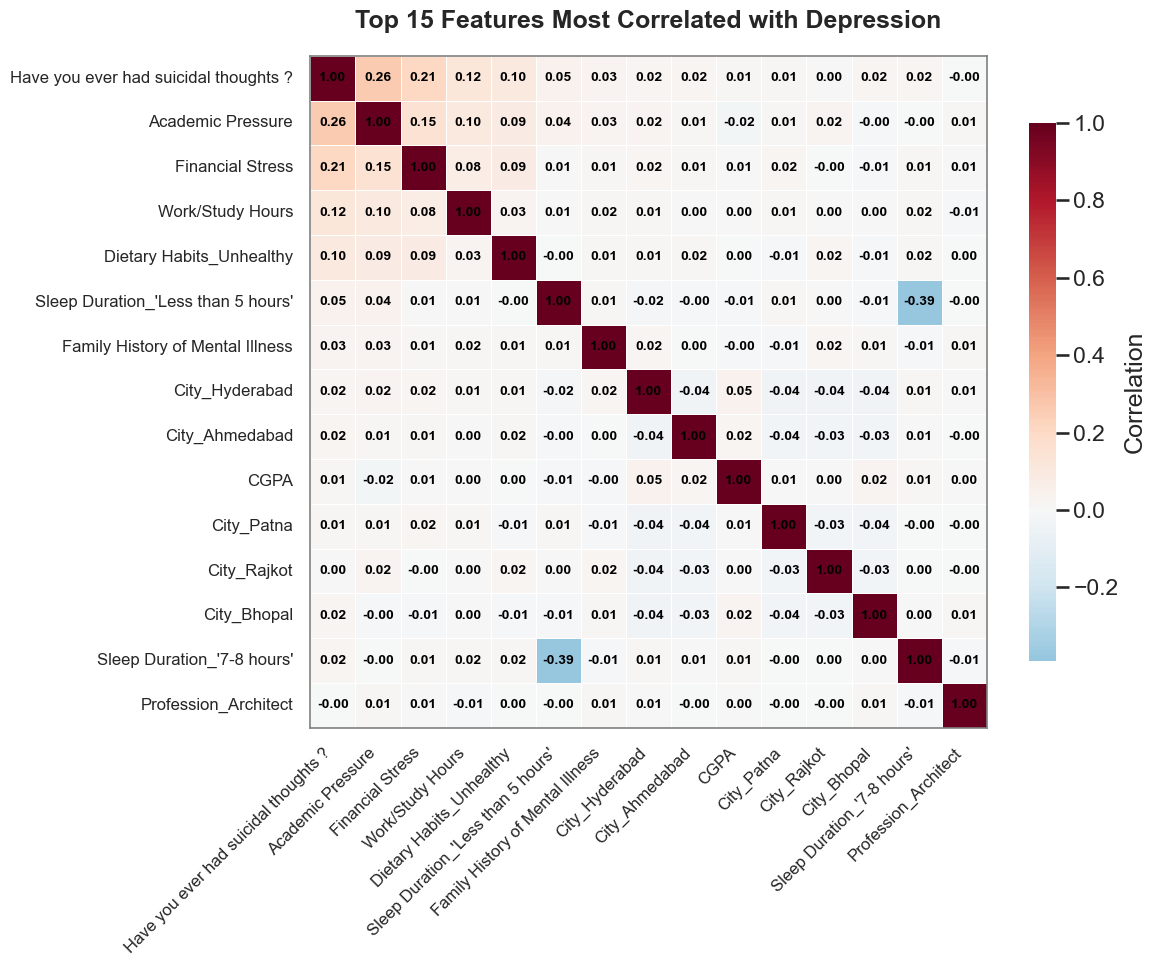

In [55]:
# Define target column
target_col = 'Depression'

# Select only numeric columns
num_df = df.select_dtypes(include=['number'])
print(f"Number of numerical features: {len(num_df.columns)}")

# Compute correlation matrix
corr_matrix = num_df.corr()

# Check that target exists
if target_col in corr_matrix.columns:
    target_corr = corr_matrix[target_col].sort_values(ascending=False)
    print("\nTop 15 most correlated variables:\n")
    print(target_corr.head(15))
else:
    raise ValueError(f"The target column '{target_col}' was not found.")

# Select top correlated features
top_n = 15
top_features = target_corr.index[1:top_n+1]  # exclude target itself

# Enhanced heatmap visualization
plt.figure(figsize=(12, 10))
sns.set_theme(style="white", context="talk")

# Create correlation matrix for selected features
corr_subset = num_df[top_features].corr()

# Draw heatmap
ax = sns.heatmap(
    corr_subset, 
    annot=True, 
    cmap='RdBu_r', 
    center=0, 
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    annot_kws={"size": 10, "weight": "bold", "color": "black"}
)

# Title and formatting
plt.title(f"Top {top_n} Features Most Correlated with {target_col}", fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

# Add a thin border around heatmap for a cleaner look
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1.2)
    spine.set_color("gray")

plt.show()


It shows a clear hierarchy of factors associated with depression:
Suicidal thoughts (0.546277), confirming the critical link between depression and suicidal risk.
Academic pressure: the second most correlated factor (0.47483), suggesting the major impact of educational stress.
Financial stress: third in rank (0.363591), reflecting economic concerns.

Satisfaction levels (work and study) show negative correlations with depression, indicating a protective role. Conversely, work pressure and job satisfaction are strongly correlated with each other (0.77), suggesting a complex relationship.

#### Advanced Visualization with Plotly

Relation between Suicidal Thoughts and Depression (more corelated feature)

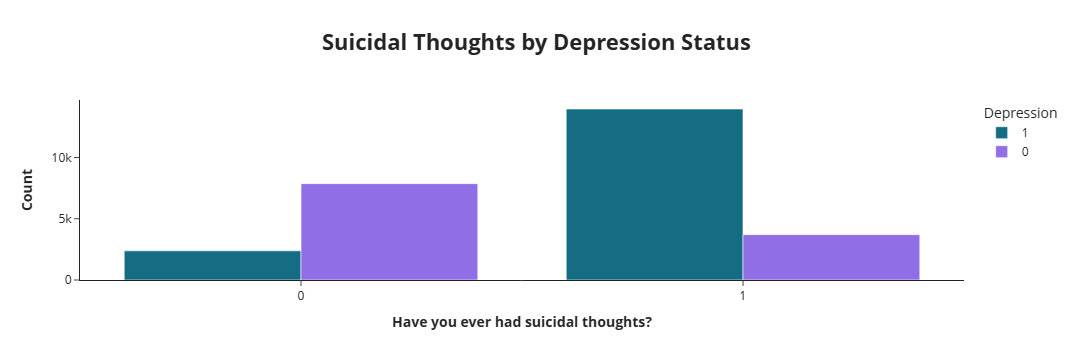

In [59]:
fig = px.histogram(
    df,
    x="Have you ever had suicidal thoughts ?",
    color="Depression",
    barmode="group",
    color_discrete_sequence=["#156D83", "#906ee6"],
    title="Relation between Suicidal Thoughts and Depression"
)

fig.update_layout(
    title=dict(
        text="<b>Suicidal Thoughts by Depression Status</b>",
        x=0.5,
        font=dict(size=22)
    ),
    xaxis_title="<b>Have you ever had suicidal thoughts?</b>",
    yaxis_title="<b>Count</b>",
    template="simple_white",
    legend_title_text="Depression"
)

fig.show()

Distribution of Academic Pressure by Depression (second more correlated feature)

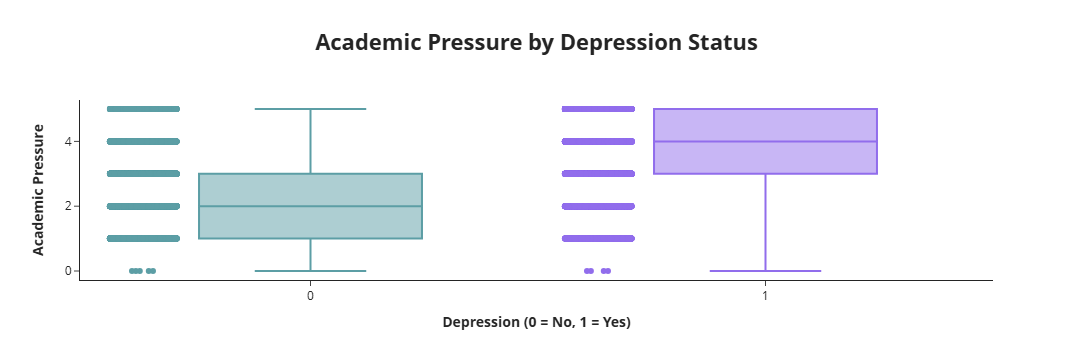

In [61]:
fig = px.box(
    df,
    x="Depression",
    y="Academic Pressure",
    color="Depression",
    points="all",
    color_discrete_sequence=["#916dec", "#5c9ea5"],
    title="Distribution of Academic Pressure by Depression"
)

fig.update_layout(
    title=dict(
        text="<b>Academic Pressure by Depression Status</b>",
        x=0.5,
        font=dict(size=22)
    ),
    xaxis_title="<b>Depression (0 = No, 1 = Yes)</b>",
    yaxis_title="<b>Academic Pressure</b>",
    template="simple_white",
    showlegend=False
)

fig.show()


#### Statistical Analysis

Top associated features with Depression (Statistical Analysis):
                                   Feature        p-value    Test
1                                      Age   0.000000e+00  T-test
2                        Academic Pressure   0.000000e+00  T-test
9                         Financial Stress   0.000000e+00  T-test
7    Have you ever had suicidal thoughts ?   0.000000e+00  T-test
8                         Work/Study Hours  8.598086e-272  T-test
108               Dietary Habits_Unhealthy  1.586630e-223  T-test
5                       Study Satisfaction  1.168379e-175  T-test
104     Sleep Duration_'More than 8 hours'   3.289974e-42  T-test
103     Sleep Duration_'Less than 5 hours'   1.036369e-39  T-test
10        Family History of Mental Illness   4.231782e-19  T-test


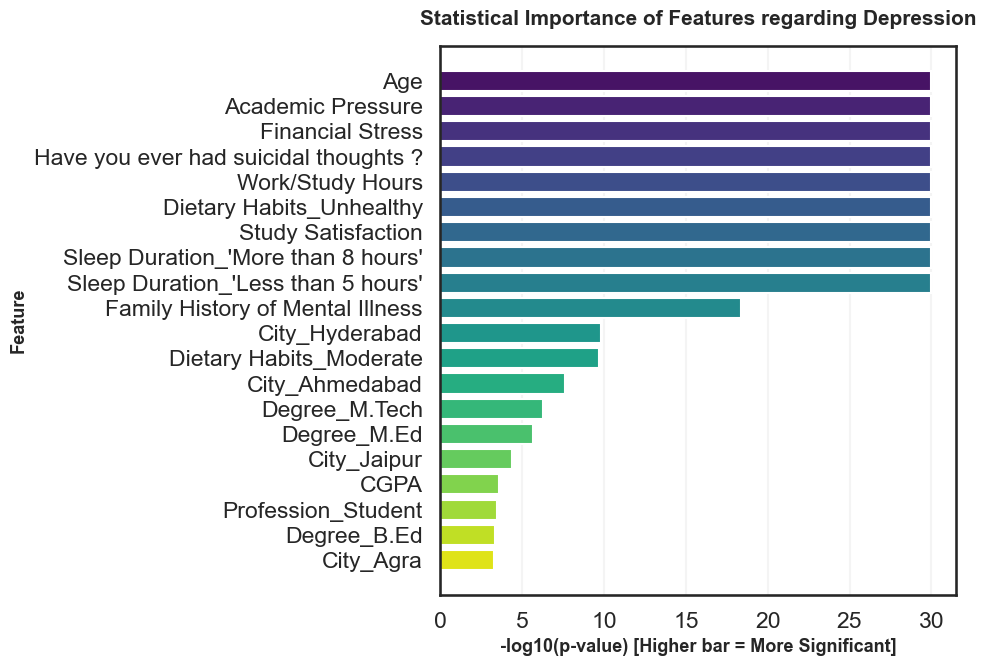

In [63]:
i# 1. CALCULATE P-VALUES (Feature Importance Analysis)

target_col = 'Depression'
p_values_list = []

# Loop through all columns except the target
for col in df.columns:
    if col == target_col or col.lower() == 'id':
        continue
    
    # Check data type
    if pd.api.types.is_numeric_dtype(df[col]):
        # Numeric: We use a T-test (ind) between Depressed (1) and Not Depressed (0) groups
        group_yes = df[df[target_col] == 1][col]
        group_no = df[df[target_col] == 0][col]
        
        # Calculate T-test (ignoring NaNs)
        stat, p_val = stats.ttest_ind(group_yes.dropna(), group_no.dropna())
        test_type = "T-test"
        
    else:
        # Categorical: We use Chi-Square test
        contingency_table = pd.crosstab(df[col], df[target_col])
        stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
        test_type = "Chi-Square"
        
    p_values_list.append({'Feature': col, 'p-value': p_val, 'Test': test_type})

# Create the correct DataFrame for plotting
features_stats_df = pd.DataFrame(p_values_list)

# Sort by p-value (smallest p-value = most significant feature)
features_stats_df = features_stats_df.sort_values(by='p-value', ascending=True)


# 2. PLOT THE RESULTS

print("Top associated features with Depression (Statistical Analysis):")
print(features_stats_df.head(10))

# Select top 20 most significant features
top_n = 20
top_features = features_stats_df.head(top_n)

plt.figure(figsize=(10, 7))

# We use -log10(p-value) to make small p-values look like big bars
# A high bar means HIGH significance
bars = plt.barh(
    top_features['Feature'], 
    -np.log10(top_features['p-value'] + 1e-30), # Add epsilon to avoid log(0) error
    color=sns.color_palette("viridis", len(top_features))
)

plt.xlabel('-log10(p-value) [Higher bar = More Significant]', fontsize=13, fontweight='bold')
plt.ylabel('Feature', fontsize=13, fontweight='bold')
plt.title('Statistical Importance of Features regarding Depression', fontsize=15, fontweight='bold', pad=15)
plt.gca().invert_yaxis() # Highest significance at the top
plt.grid(alpha=0.2, axis='x')

plt.tight_layout()
plt.show()

### Statistical Feature Importance Analysis

To understand the drivers of depression among students, we performed statistical tests (T-test for numerical, Chi-Square for categorical variables) to calculate the **p-value** of each feature. The results, visualized in the bar chart above using the `-log10(p-value)` scale, reveal a clear hierarchy of predictors.

**1. Critical Risk Factors (Top Tier)**
*   **Academic Pressure, Financial Stress, and Age** show the highest statistical significance (p-values close to 0). These are the primary determinants in our dataset.
*   **Suicidal Thoughts** is naturally strongly correlated, acting more as a severe symptom than a predictor, but highly relevant for classification.

**2. Lifestyle Indicators**
*   **Work/Study Hours** and **Dietary Habits (Unhealthy)** are extremely significant predictors.
*   **Sleep Patterns:** Both extremes ("Less than 5 hours" and "More than 8 hours") appear as strong indicators, suggesting that irregular sleep is closely linked to mental health issues.

**3. Low-Impact Features**
*   **Geography and Education Type:** Features like specific **Cities** (e.g., Agra, Jaipur) or **Degrees** (e.g., B.Ed, M.Tech) appear at the bottom of the chart. While they have some statistical relevance, they are far less predictive than psychological and lifestyle factors.
*   **CGPA:** Interestingly, academic grades (CGPA) are less significant than the *pressure* to perform. This suggests that the internal feeling of pressure is a better predictor of depression than the actual academic result.

**Strategic Decision:**
Based on this analysis, we can consider **dimensionality reduction** by removing low-impact features (like City or Degree) to simplify the model and prevent overfitting, focusing the algorithm on the psychological and lifestyle variables.

#### Analysis 

Academic and financial stress, combined with low satisfaction levels, are the main risk drivers. Interventions should prioritize managing academic pressure and providing preventive psychological support

Save the data set cleaned

In [75]:
df.to_csv("clean_dataset.csv", index=False)